In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
airbnb = pd.read_csv("train.csv")
airbnb.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       74111 non-null  int64  
 1   log_price                74111 non-null  float64
 2   property_type            74111 non-null  object 
 3   room_type                74111 non-null  object 
 4   accommodates             74111 non-null  int64  
 5   bathrooms                73911 non-null  float64
 6   bed_type                 74111 non-null  object 
 7   cancellation_policy      74111 non-null  object 
 8   cleaning_fee             74111 non-null  bool   
 9   city                     74111 non-null  object 
 10  description              74111 non-null  object 
 11  host_has_profile_pic     73923 non-null  object 
 12  host_identity_verified   73923 non-null  object 
 13  host_response_rate       55812 non-null  float64
 14  instant_bookable      

In [ ]:
#airbnb.drop(['id', 'description', 'latitude', 'longitude','name', 'zipcode', 'thumbnail_url', 'neighbourhood'],axis=1, inplace=True)
#airbnb.dropna(inplace=True)

In [ ]:
airbnb['Days_since_last_review']= (pd.to_datetime("now") - pd.to_datetime(airbnb['last_review'])).dt.days
airbnb['Days_since_first_review']= (pd.to_datetime("now") - pd.to_datetime(airbnb['first_review'])).dt.days
airbnb['Days_as_host']= (pd.to_datetime("now") - pd.to_datetime(airbnb['host_since'])).dt.days

airbnb.drop(['last_review', 'first_review', 'host_since'],axis=1, inplace=True)

In [ ]:
mask = airbnb['host_response_rate'].notnull()
airbnb['host_response_rate'] = airbnb[mask]['host_response_rate'].str.rstrip('%').astype('int')

In [ ]:
airbnb['amenities']=airbnb['amenities'].str.strip("}")
airbnb['amenities']=airbnb['amenities'].str.strip("{")
airbnb['no_of_amenities']=airbnb['amenities'].str.count(',').astype('int')+1

airbnb['price'] = np.exp(airbnb['log_price']).round()
airbnb.drop('amenities', axis=1,inplace=True)

In [ ]:
airbnb['room_type'].value_counts()

Entire home/apt    41310
Private room       30638
Shared room         2163
Name: room_type, dtype: int64

In [ ]:
'''q_25=airbnb['price'].quantile(0.25)
q_75=airbnb['price'].quantile(0.75)
iqr= q_75-q_25
upper_bound = q_75 + (1.5*iqr)
lower_bound = q_25 - (1.5*iqr)
airbnb=airbnb[(airbnb['price']< upper_bound) & (airbnb['price']>lower_bound)]'''

"q_25=airbnb['price'].quantile(0.25)\nq_75=airbnb['price'].quantile(0.75)\niqr= q_75-q_25\nupper_bound = q_75 + (1.5*iqr)\nlower_bound = q_25 - (1.5*iqr)\nairbnb=airbnb[(airbnb['price']< upper_bound) & (airbnb['price']>lower_bound)]"

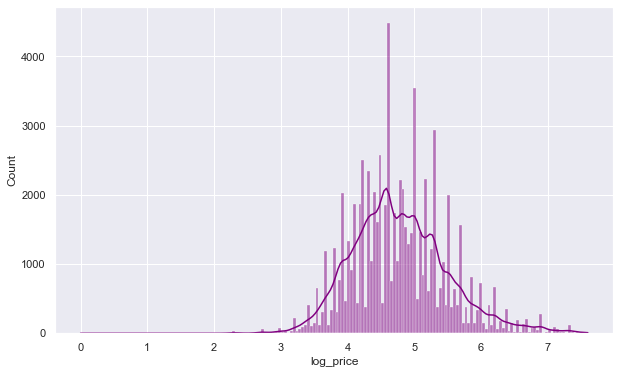

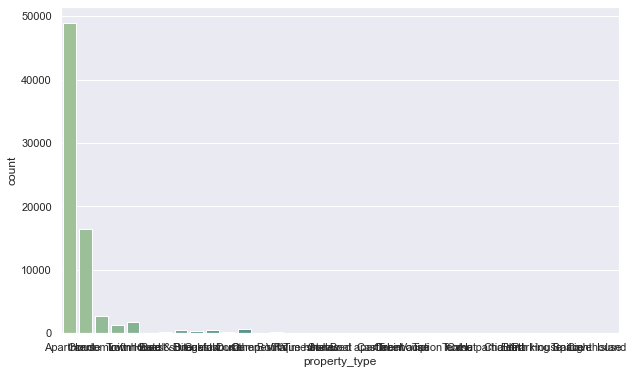

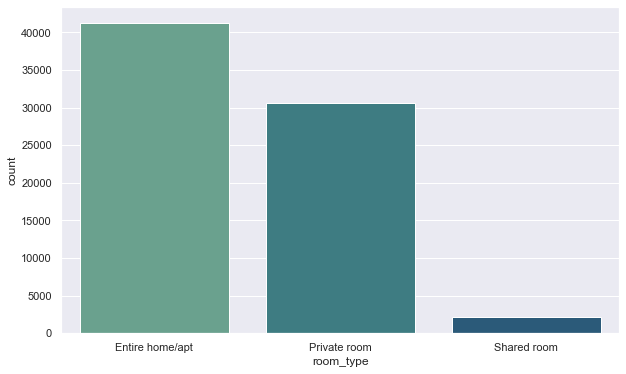

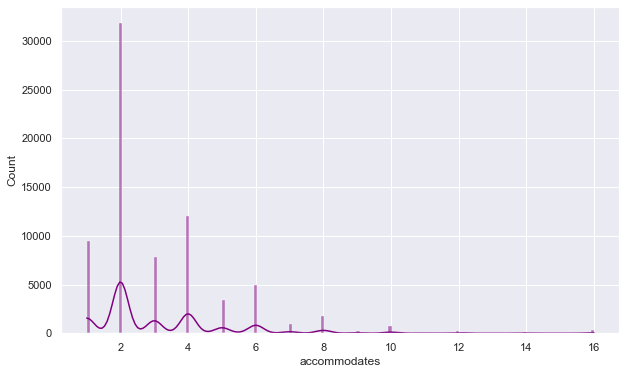

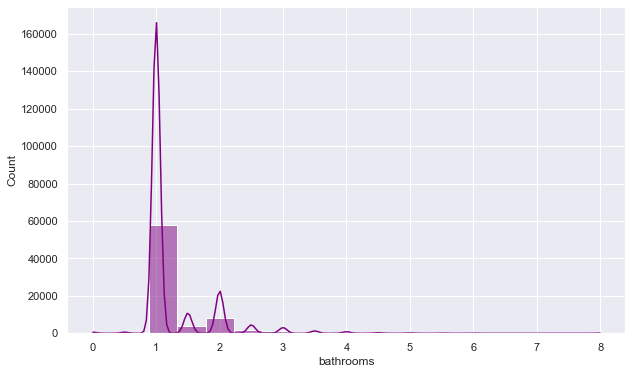

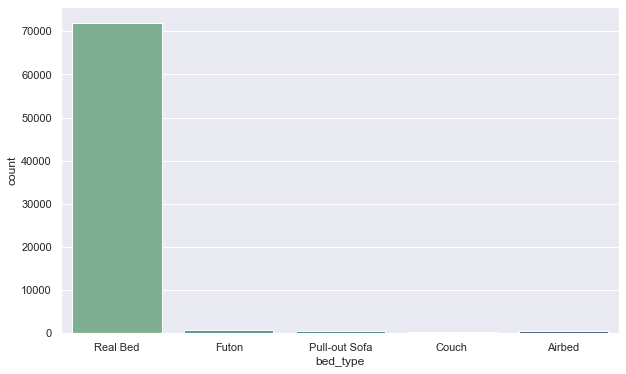

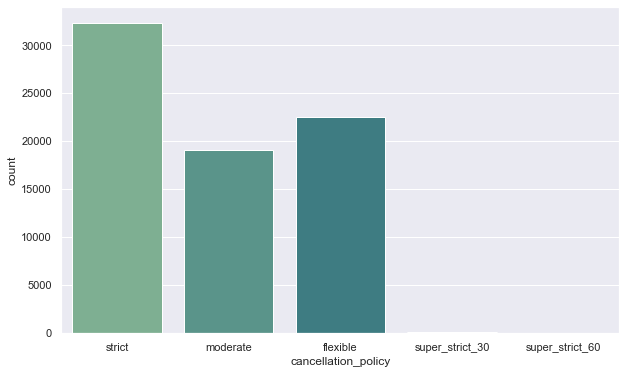

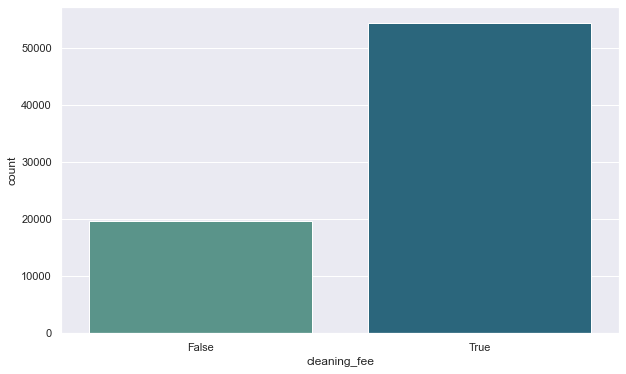

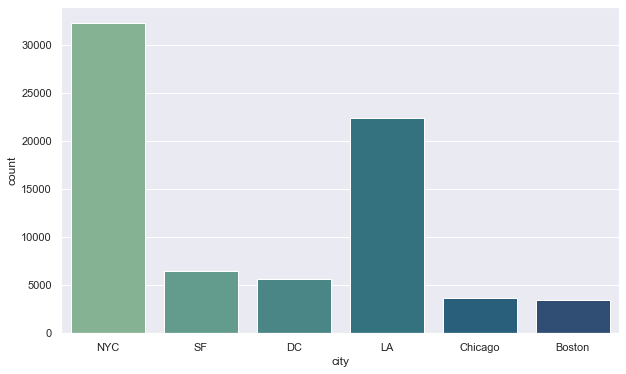

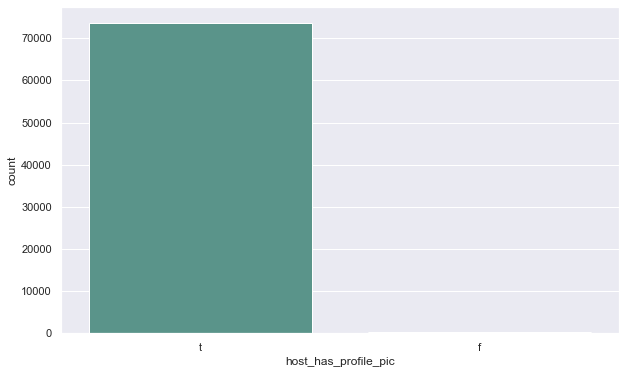

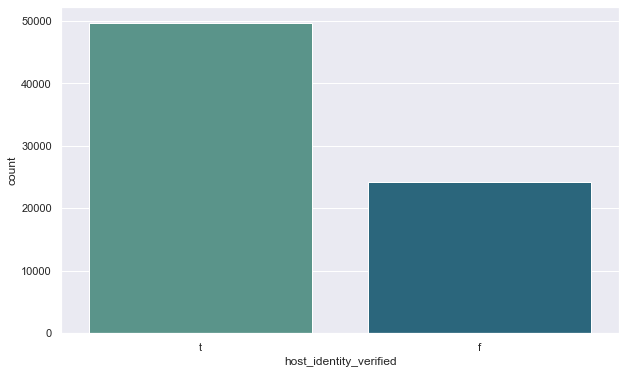

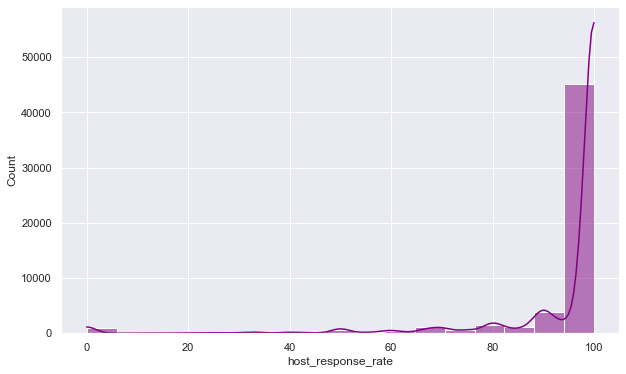

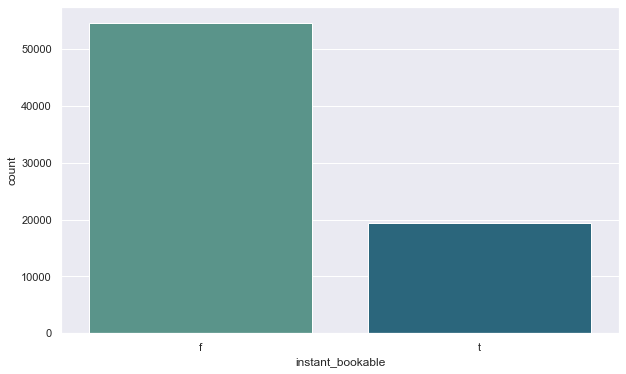

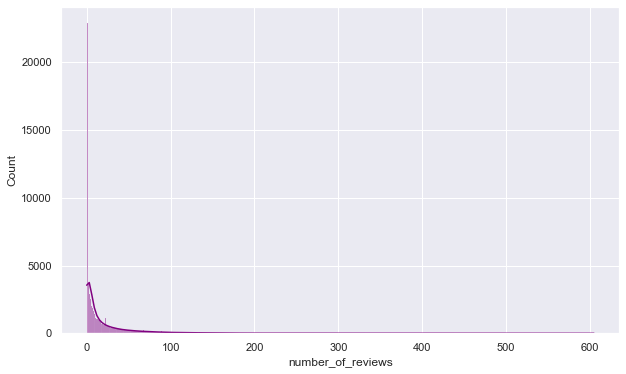

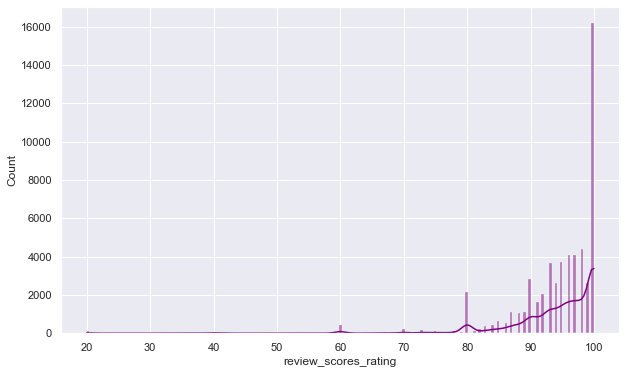

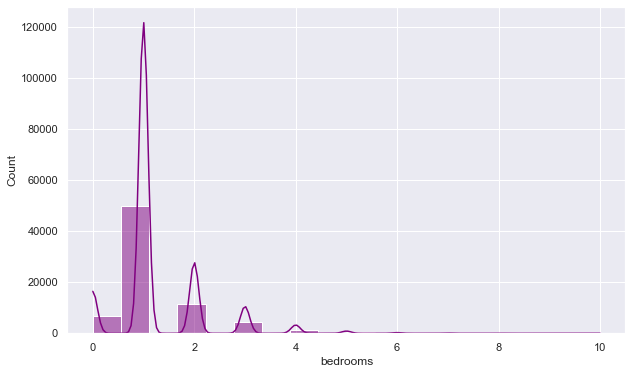

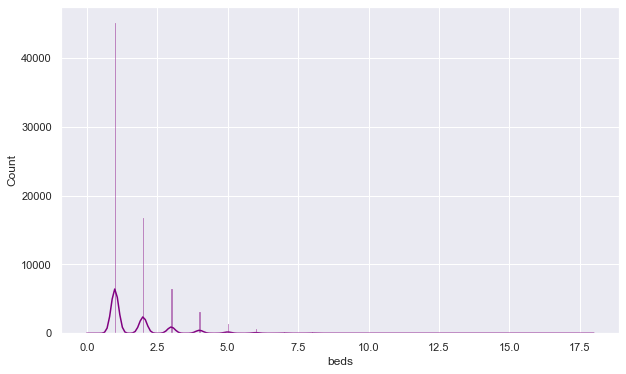

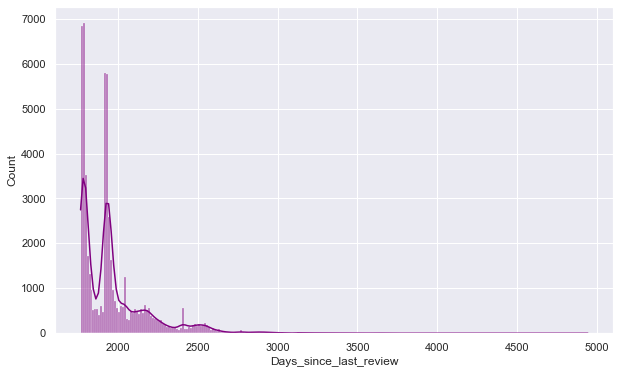

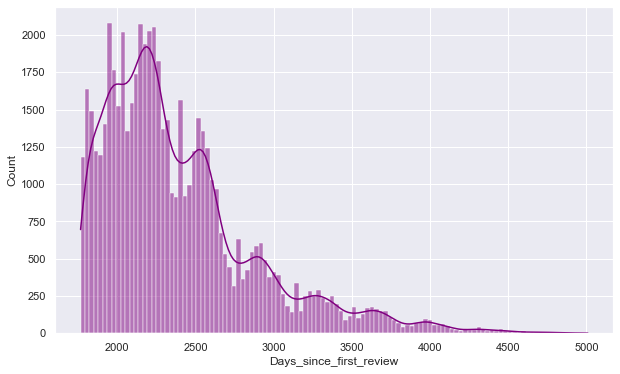

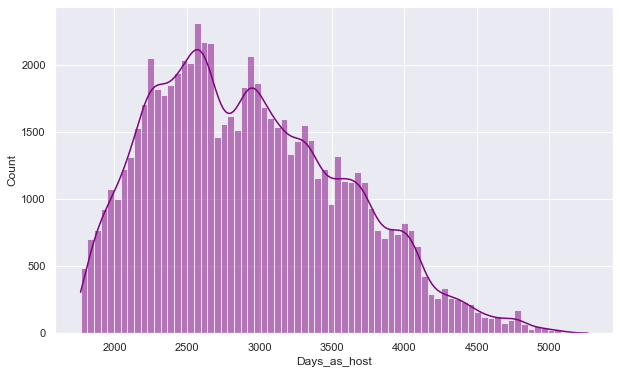

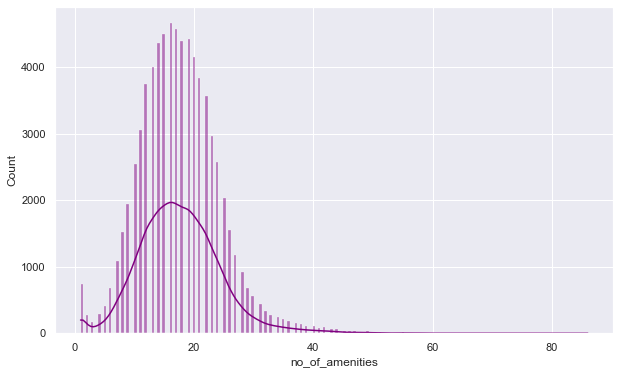

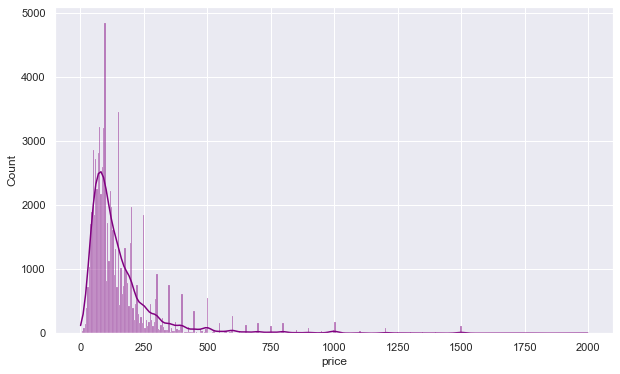

In [ ]:
airbnb_feature_dist= airbnb.drop(['id', 'description', 'latitude', 'longitude','name', 'zipcode', 'thumbnail_url', 'neighbourhood'], axis=1)

for c in airbnb_feature_dist.columns:
    if airbnb_feature_dist[c].dtype in ['object','bool']:
        plt.figure(figsize=(10,6))
        sns.countplot(airbnb_feature_dist[c],palette='crest')
        plt.show()
    else:
        plt.figure(figsize=(10,6))
        sns.histplot(airbnb_feature_dist[c],kde=(len(airbnb_feature_dist[c].unique())>10),color='purple')
        plt.show()

Most of the listings are for entire home/apt and private rooms, less number for shared rooms <br>
Most accomodate 1-4 persons <br>
Mostly 1-2 bathrooms <br>
Most have real beds, compared to futon/pull out sofa/couch/airbed <br>
Most of the listings are in NYC and LA <br>
Host identity verified - worth exploring how it affects demand <br>
host response rate >80% <br>
Number of amenities listed has a mean of around 20 <br>
review_scores_rating are mostly above 85 , and majority are 100

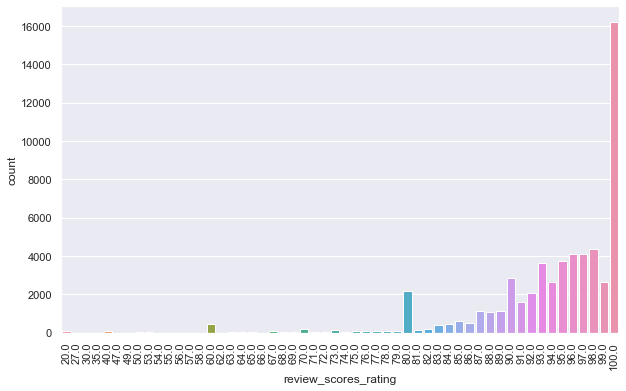

In [ ]:
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
ax=sns.countplot(x=airbnb['review_scores_rating'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()
#sns.barplot(x=airbnb['review_scores_rating'],y=(airbnb['number_of_reviews']))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

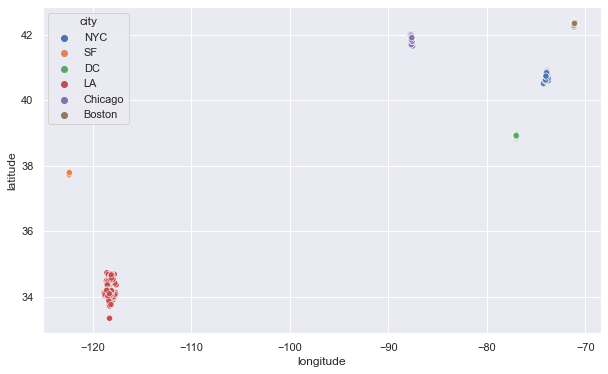

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb['longitude'],airbnb['latitude'],hue=airbnb.city)

<AxesSubplot:xlabel='price', ylabel='property_type'>

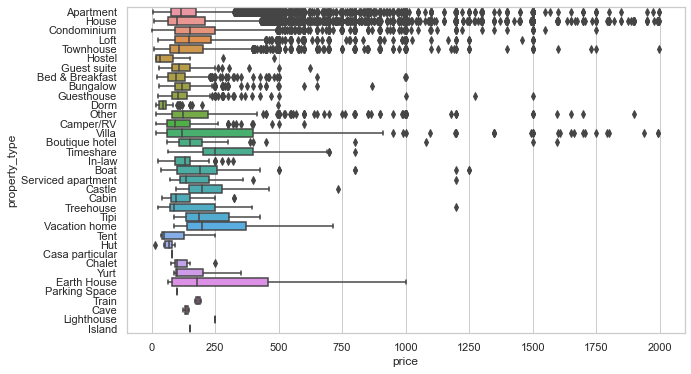

In [ ]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.boxplot(x=(airbnb['price']),y=airbnb['property_type'])

In [ ]:
airbnb.groupby('property_type')['price'].agg(['median', 'mean']).reset_index().sort_values(by='median', ascending=False).iloc[:5]

,property_type,median,mean
21,Lighthouse,250.0,250.000000
27,Timeshare,250.0,310.454545
32,Vacation home,199.0,277.000000
8,Castle,199.0,256.076923
2,Boat,189.0,252.246154


Lighthouse, Timeshare, Vacation home, Castle, Boat have the highest median prices

<AxesSubplot:xlabel='city', ylabel='price'>

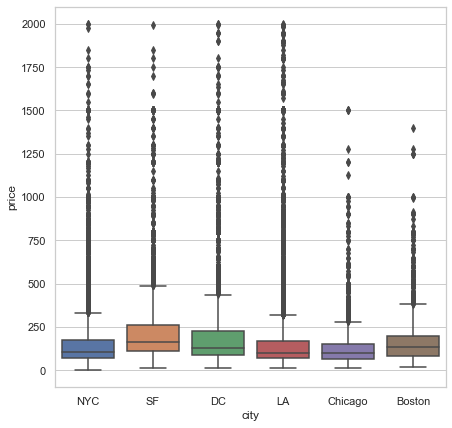

In [ ]:
plt.figure(figsize=(7,7))
sns.set_theme(style="whitegrid")
sns.boxplot(x=(airbnb['city']),y=airbnb['price'])

SF has the highest median prices for airbnb's followed by Boston.

In [ ]:
df1= airbnb.groupby('city').size().reset_index(name='Num_of_airbnb')
df2= airbnb.groupby('city')['number_of_reviews'].sum().reset_index(name='Num_of_reviews')
merged= df1.merge(df2, how='inner', on='city')
merged['Avg_no_of_reviews_per_airbnb']=merged['Num_of_reviews']/merged['Num_of_airbnb']
merged.sort_values(by='Avg_no_of_reviews_per_airbnb', ascending=False)

,city,Num_of_airbnb,Num_of_reviews,Avg_no_of_reviews_per_airbnb
5,SF,6434,184530,28.680448
1,Chicago,3719,97571,26.235816
0,Boston,3468,89094,25.690311
3,LA,22453,478360,21.304948
2,DC,5688,113204,19.902250
4,NYC,32349,586203,18.121209


<AxesSubplot:xlabel='city', ylabel='Avg_no_of_reviews_per_airbnb'>

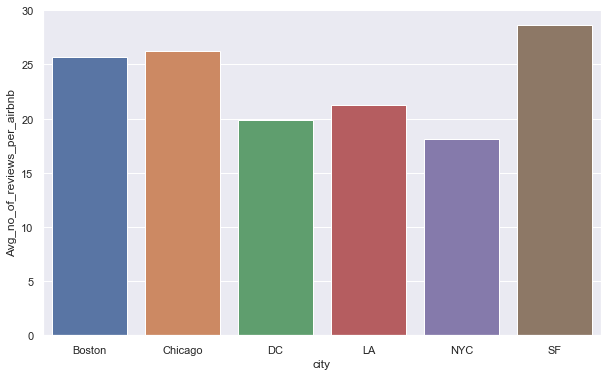

In [ ]:
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.barplot(x=merged['city'],y=(merged['Avg_no_of_reviews_per_airbnb']))

SF has the highest avg number of ratings per airbnb, followed by Chicago

<Figure size 720x432 with 0 Axes>

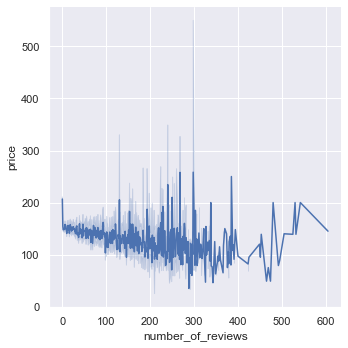

In [ ]:
plt.figure(figsize=(10,6))
sns.relplot(x="number_of_reviews", y="price", kind="line", data=airbnb)

<AxesSubplot:xlabel='Days_since_last_review', ylabel='city'>

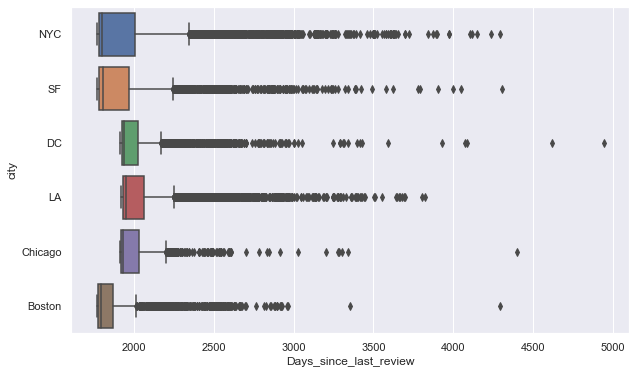

In [ ]:
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
sns.boxplot(y=airbnb['city'],x=(airbnb['Days_since_last_review']))

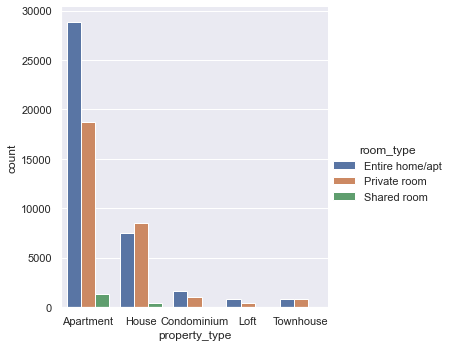

In [ ]:
sns.catplot(data=airbnb[['room_type', 'property_type']]\
            .where(airbnb['property_type'].isin(['Apartment', 'House', 'Condominium', 'Townhouse', 'Loft']))\
            , x='property_type', hue='room_type', kind='count')
#legend(['Shared Room', 'Private Room', 'Entire Home/Apt'])

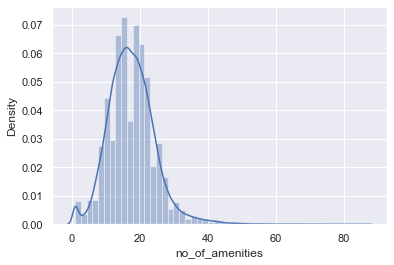

In [ ]:
x= airbnb.iloc[:,28]
sns.distplot(x);

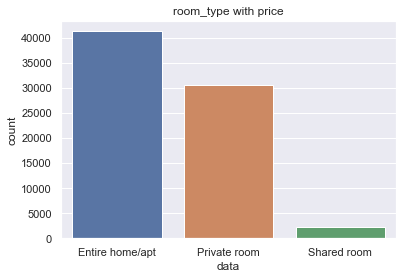

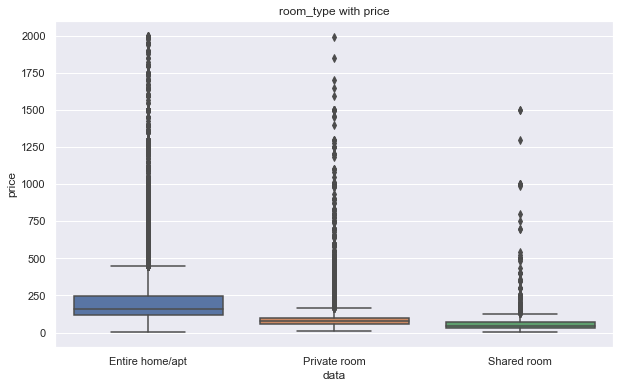

<AxesSubplot:title={'center':'room_type with price'}, xlabel='data', ylabel='price'>

In [ ]:
def col_price(column):
  plot_data = pd.DataFrame({
      'data': airbnb[column],
      'price': airbnb.price
  })
  sns.countplot(x="data", data=plot_data)
  plt.title(column+' with price')
  plt.show()


  plt.figure(figsize=(10,6))
  g = sns.boxplot(data=plot_data,orient='v', x = 'data', y = 'price')
  plt.title(column+' with price')
  plt.show()
  return g

col_price('room_type')

As expected, staying in an entire home/apt is more expensive

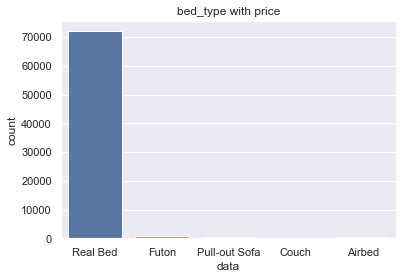

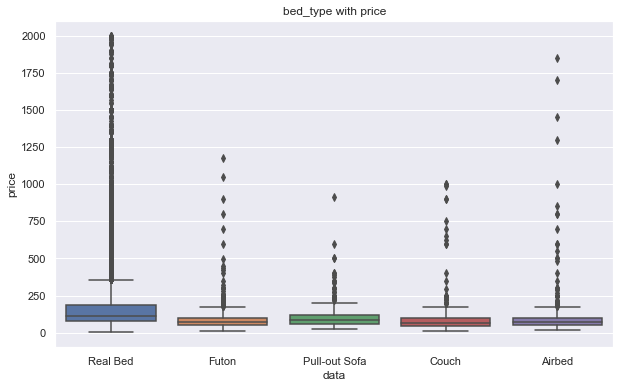

<AxesSubplot:title={'center':'bed_type with price'}, xlabel='data', ylabel='price'>

In [ ]:
col_price('bed_type')

Real bed - more expensive

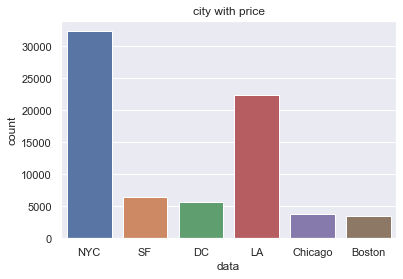

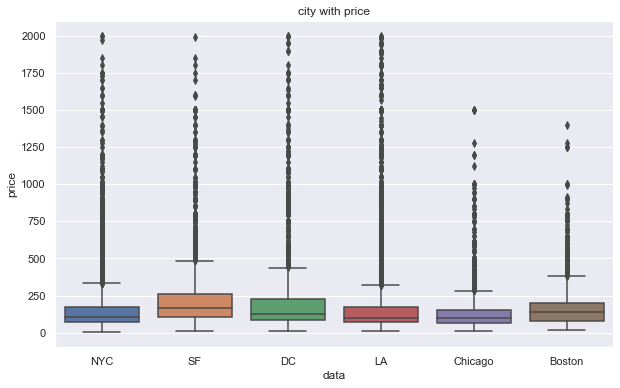

<AxesSubplot:title={'center':'city with price'}, xlabel='data', ylabel='price'>

In [ ]:
col_price('city')

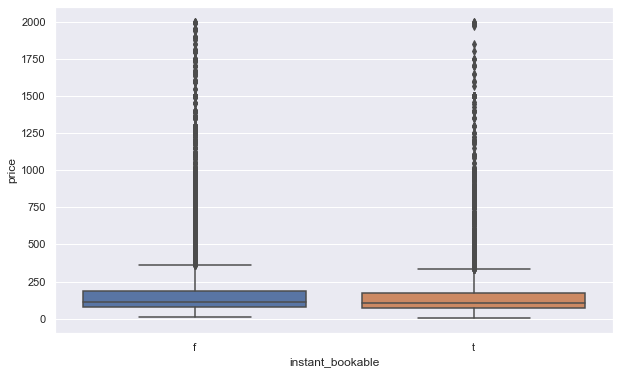

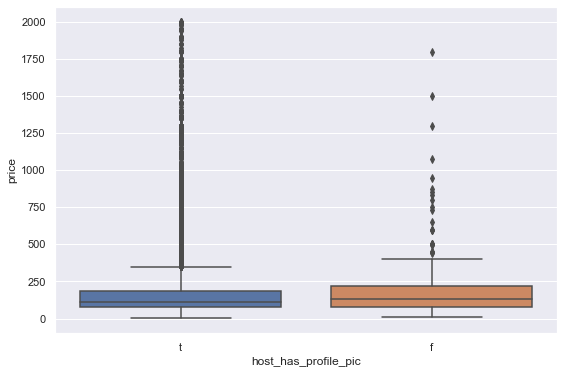

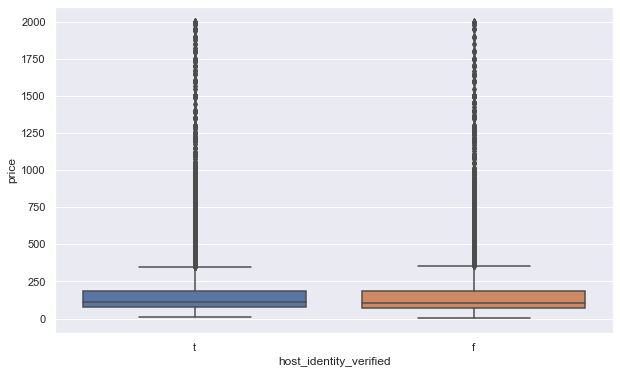

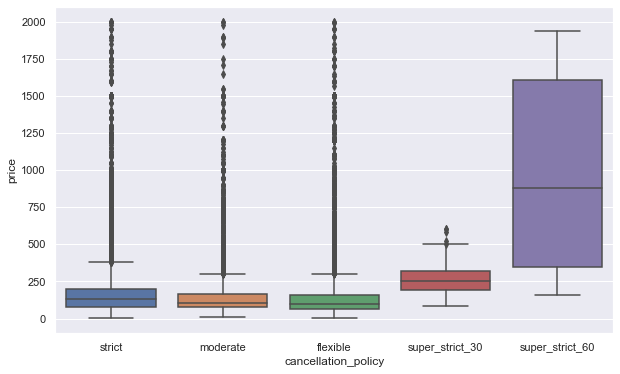

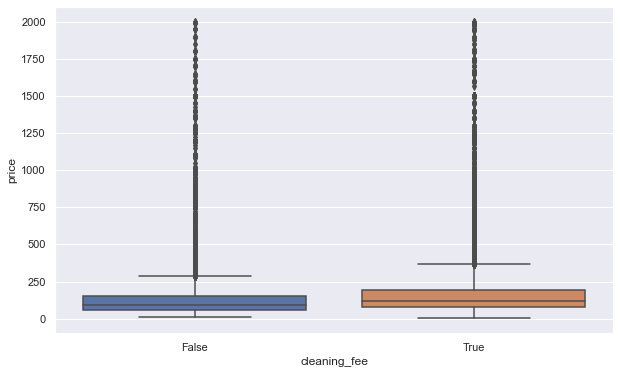

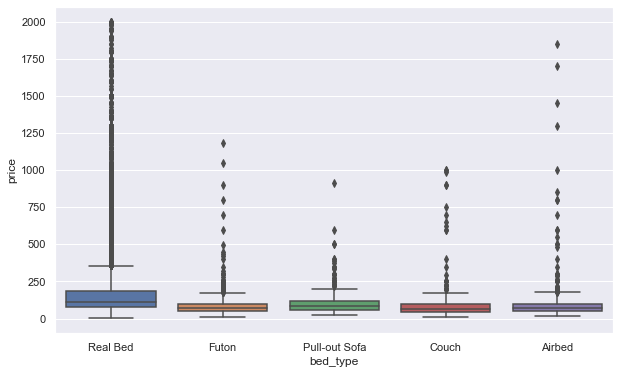

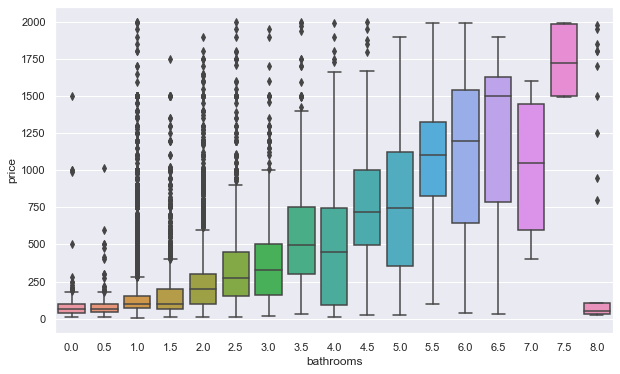

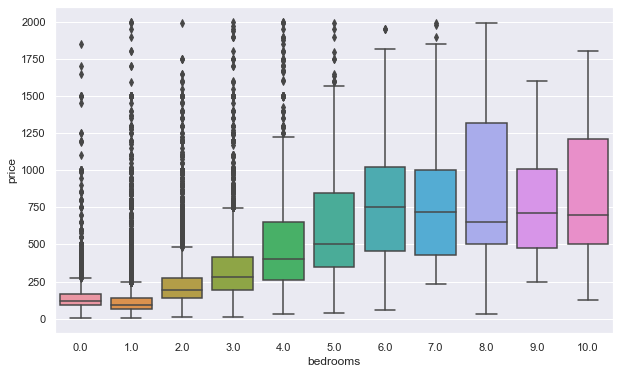

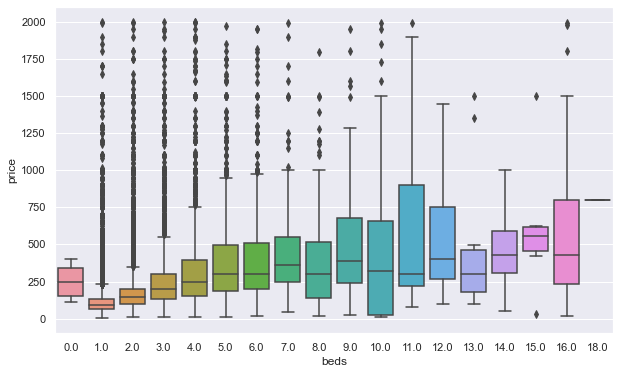

In [ ]:
#airbnb=airbnb[(airbnb['price']< upper_bound) & (airbnb['price']>lower_bound)]

plt.figure(figsize=(10,6))
sns.boxplot(x="instant_bookable", y="price", data=airbnb)
plt.show()
plt.figure(figsize=(9,6))
sns.boxplot(x="host_has_profile_pic", y="price", data=airbnb)
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x="host_identity_verified", y="price", data=airbnb)
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x="cancellation_policy", y="price", data=airbnb)
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x="cleaning_fee", y="price", data=airbnb)
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x="bed_type", y="price", data=airbnb)
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x="bathrooms", y="price", data=airbnb)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x="bedrooms", y="price", data=airbnb)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x="beds", y="price", data=airbnb)
plt.show()



Host features do not seem to significantly affect price, but number of bedrooms and bathrooms do

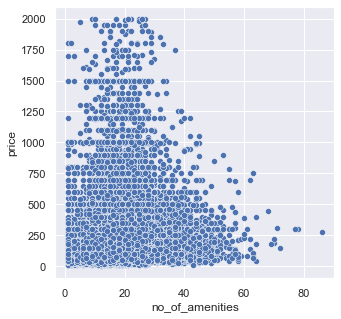

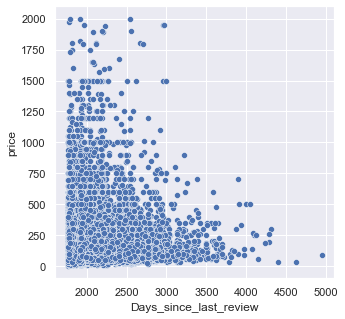

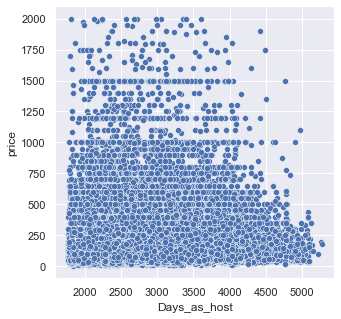

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="no_of_amenities", y="price", data=airbnb)
plt.show()

plt.figure(figsize=(5,5))
sns.scatterplot(x="Days_since_last_review", y="price", data=airbnb)
plt.show()

plt.figure(figsize=(5,5))
sns.scatterplot(x="Days_as_host", y="price", data=airbnb)
plt.show()

When a property is more recently reviewed, it has a higher price.

<AxesSubplot:>

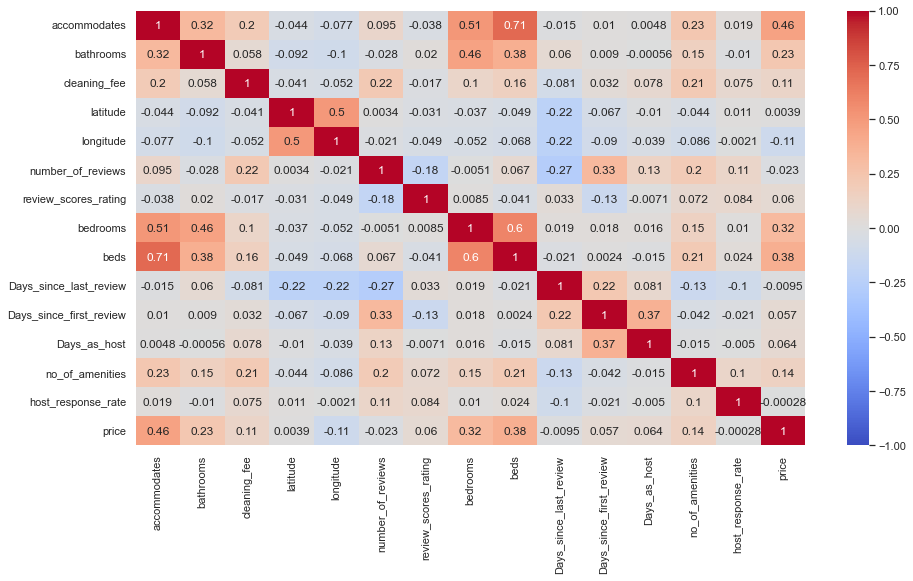

In [ ]:
airbnb1 = airbnb[['accommodates','bathrooms','cleaning_fee','latitude', 'longitude', 'number_of_reviews', \
                 'review_scores_rating','bedrooms','beds','Days_since_last_review','Days_since_first_review', \
                 'Days_as_host', 'no_of_amenities','host_response_rate', 'price']]
airbnb_correlation = airbnb1.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(airbnb_correlation, annot=True, vmin=-1,vmax=1,cmap='coolwarm')

### Which city has the most expensive neighborhoods? 

<AxesSubplot:>

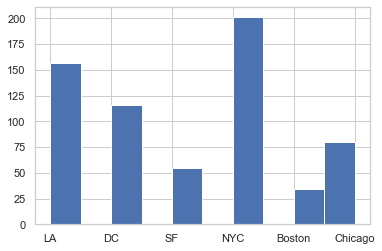

In [ ]:
most_expensive_neighbourhoods=airbnb.groupby(['city','neighbourhood'])['price'].mean().reset_index().sort_values(by='price',ascending=False)
most_expensive_neighbourhoods['city'].hist()